In [142]:
import pandas as pd
#from fast_ml.model_development import train_valid_test_split
from sklearn.model_selection import train_test_split
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from scipy.io import loadmat
import numpy as np

## Test 

In [27]:
df = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/EL_data_filtered.csv')

In [28]:
base_dir = '/Users/madsandersen/PycharmProjects/BscProjektData'

gt_dirs = []
for i in ['Series1','Series2','Series3','Series4','Series5','Series6']:
    d = os.listdir(f'{base_dir}/BachelorProject/Data/VitusData/Serier/{i}/MaskGT')
    for direc in d: 
        gt_dirs.append(direc)

In [29]:
images = []

for i in ['Series1','Series2','Series3','Series4','Series5','Series6']:
    d = os.listdir(f'{base_dir}/BachelorProject/Data/VitusData/Serier/{i}/CellsCorr')
    for im in d: 
        images.append(im)

In [34]:
def get_image_name(file_name):
    return file_name[18:]

In [19]:
im_name = get_image_name(images[0])

In [25]:
gt_name = f'{gt_dirs[0][:17]}{im_name}.mat'
f = loadmat(f'{base_dir}/BachelorProject/Data/VitusData/Serier/Series1/MaskGT/GT_Serie_1_Image_-1_4085_Cell_Row2_Col_2.mat')

In [38]:
gt_dirs

['GT_Serie_1_Image_-13_4088_Cell_Row9_Col_3.mat',
 'GT_Serie_1_Image_-17_4095_Cell_Row9_Col_5.mat',
 'GT_Serie_1_Image_-12_4124_Cell_Row6_Col_3.mat',
 'GT_Serie_1_Image_-7_4138_Cell_Row3_Col_3.mat',
 'GT_Serie_1_Image_-4_4106_Cell_Row5_Col_3.mat',
 'GT_Serie_1_Image_-2_4141_Cell_Row7_Col_6.mat',
 'GT_Serie_1_Image_-11_4135_Cell_Row3_Col_2.mat',
 'GT_Serie_1_Image_-3_4113_Cell_Row6_Col_3.mat',
 'GT_Serie_1_Image_-1_4100_Cell_Row4_Col_1.mat',
 'GT_Serie_1_Image_-10_4104_Cell_Row7_Col_6.mat',
 'GT_Serie_1_Image_-20_4101_Cell_Row3_Col_2.mat',
 'GT_Serie_1_Image_-5_4099_Cell_Row9_Col_4.mat',
 'GT_Serie_1_Image_-13_4096_Cell_Row9_Col_6.mat',
 'GT_Serie_1_Image_-10_4125_Cell_Row8_Col_2.mat',
 'GT_Serie_1_Image_-9_4125_Cell_Row6_Col_2.mat',
 'GT_Serie_1_Image_-8_4138_Cell_Row7_Col_2.mat',
 'GT_Serie_1_Image_-17_4087_Cell_Row8_Col_5.mat',
 'GT_Serie_1_Image_-18_4132_Cell_Row4_Col_4.mat',
 'GT_Serie_1_Image_-13_4124_Cell_Row7_Col_4.mat',
 'GT_Serie_1_Image_-10_4125_Cell_Row5_Col_1.mat',
 'GT_Ser

In [122]:
is_fault = []
areas = []
snames = ['Series1','Series2','Series3','Series4','Series5','Series6']
for idx,image in df.iterrows():
    name = get_image_name(image['name'])
    ser = image['series']
    serie = snames[image['series']-1]
    
    p = f'GT_Serie_{ser}_Image_{name}.mat'
    if p in gt_dirs:
        is_fault.append(1)
        f = loadmat(f'{base_dir}/BachelorProject/Data/VitusData/Serier/{serie}/MaskGT/{p}')
        if len(f['GTLabel']) > 1:
            areas.append([f['GTMask'][:,:,i].sum() for i in range(len(f['GTLabel']))])
        else:
            areas.append([f['GTMask'].sum()])
        #else:
        #    areas.append([0])
    else: 
        areas.append([0])
        is_fault.append(0)

In [123]:
len(is_fault),len(df),len(areas)

(36061, 36061, 36061)

In [124]:
df['is_fault'] = is_fault
df['areas'] = areas

In [205]:
defective = []
remove = [] 
i_removed = []
for idx,row in df.iterrows():
    area = row['areas']
    name = row['name']
    area = np.array(area)
    if sum(area>410) > 0:
        defective.append(1)
        if sum(area<2100) > 0:
            i_removed.append(name)
    else: 
        remove.append(idx)

sum(defective)

991

In [203]:
sum(defective)

991

In [206]:
len(remove)

35070

In [163]:
row

name        Serie_1_ImageCorr_-10_4081_Cell_Row10_Col_1
series                                                1
panel_id                                        10_4081
row                                                  10
col                                                   1
width                                               323
height                                              323
GS_mean                                        0.494703
is_fault                                              0
areas                                               [0]
Name: 0, dtype: object

## Actual splitting

In [292]:
data = pd.read_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/DataSetVitusStats.csv')

In [293]:
len(data)

36052

In [294]:
data['MaskDir'] = data['MaskDir'].astype(str)

In [295]:
display(data)

,ImageDir,Label,MaskDir,is_fault
0,/Users/madsandersen/PycharmProjects/BscProjekt...,['Negative'],nan,0
1,/Users/madsandersen/PycharmProjects/BscProjekt...,['Negative'],nan,0
2,/Users/madsandersen/PycharmProjects/BscProjekt...,['Negative'],nan,0
3,/Users/madsandersen/PycharmProjects/BscProjekt...,['Negative'],nan,0
4,/Users/madsandersen/PycharmProjects/BscProjekt...,['Negative'],nan,0
...,...,...,...,...
36047,/Users/madsandersen/PycharmProjects/BscProjekt...,['Negative'],nan,0
36048,/Users/madsandersen/PycharmProjects/BscProjekt...,['Negative'],nan,0
36049,/Users/madsandersen/PycharmProjects/BscProjekt...,['Negative'],nan,0
36050,/Users/madsandersen/PycharmProjects/BscProjekt...,['Negative'],nan,0


In [296]:
data['Label'] = data['Label'].apply(lambda x: ast.literal_eval(x))
data['MaskDir'] = data['MaskDir'].apply(lambda x: ast.literal_eval(x) if str(x) != 'nan' else x)

In [297]:
display(data)

,ImageDir,Label,MaskDir,is_fault
0,/Users/madsandersen/PycharmProjects/BscProjekt...,[Negative],nan,0
1,/Users/madsandersen/PycharmProjects/BscProjekt...,[Negative],nan,0
2,/Users/madsandersen/PycharmProjects/BscProjekt...,[Negative],nan,0
3,/Users/madsandersen/PycharmProjects/BscProjekt...,[Negative],nan,0
4,/Users/madsandersen/PycharmProjects/BscProjekt...,[Negative],nan,0
...,...,...,...,...
36047,/Users/madsandersen/PycharmProjects/BscProjekt...,[Negative],nan,0
36048,/Users/madsandersen/PycharmProjects/BscProjekt...,[Negative],nan,0
36049,/Users/madsandersen/PycharmProjects/BscProjekt...,[Negative],nan,0
36050,/Users/madsandersen/PycharmProjects/BscProjekt...,[Negative],nan,0


In [298]:
data['ImageDir'] = data['ImageDir'].apply(lambda x: x.split('/')[7:])
data['ImageDir'] = data['ImageDir'].apply(lambda x: '/'.join(x))

In [299]:
#data['MaskDir'] = data['MaskDir'].astype(str)

In [300]:
display(data['ImageDir'])

0        VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...
1        VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...
2        VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...
3        VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...
4        VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...
                               ...                        
36047    VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...
36048    VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...
36049    VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...
36050    VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...
36051    VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...
Name: ImageDir, Length: 36052, dtype: object

In [303]:
data['MaskDir'][data['MaskDir'] != 'nan'][27]

['VitusData/VitusStatsMask/-18_4101_Cell_Row4_Col_3_CrackB_0.png']

In [302]:
data['MaskDir'] = data['MaskDir'].apply(lambda x: [y.split('/')[7:] for y in x] if str(x) != 'nan' else x)
data['MaskDir'] = data['MaskDir'].apply(lambda x: ['/'.join(y) for y in x] if x != 'nan' else x)

In [218]:
data['MaskDir'][data['MaskDir'] != 'nan'].iloc[0][0]

''

In [304]:
display(data[data['MaskDir']!= 'nan'])

,ImageDir,Label,MaskDir,is_fault
27,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,[CrackB],[VitusData/VitusStatsMask/-18_4101_Cell_Row4_C...,1
33,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,"[CrackB, CrackB]",[VitusData/VitusStatsMask/-19_4101_Cell_Row3_C...,1
41,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,[CrackC],[VitusData/VitusStatsMask/-2_4107_Cell_Row2_Co...,1
52,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,"[FingerFailure, FingerFailure]",[VitusData/VitusStatsMask/-11_4118_Cell_Row8_C...,1
64,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,"[CrackA, FingerFailure, FingerFailure, FingerF...",[VitusData/VitusStatsMask/-16_4133_Cell_Row2_C...,1
...,...,...,...,...
35785,VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...,[CrackB],[VitusData/VitusStatsMask/-4_4285_PC_Cell_Row3...,1
35862,VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...,[CrackC],[VitusData/VitusStatsMask/-13_4282_PC_Cell_Row...,1
35904,VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...,"[CrackC, CrackC]",[VitusData/VitusStatsMask/-15_4251_PC_Cell_Row...,1
35987,VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...,[CrackC],[VitusData/VitusStatsMask/-22_4279_PC_Cell_Row...,1


In [305]:
def overview_disease(data):
  overview = {}
  for findings in data['Label']:
    for j in findings:
      if j in overview.keys():
        overview[j] += 1
      else:
        overview[j] = 1
  return overview
overview = overview_disease(data)
display(overview)

{'Negative': 35052,
 'CrackB': 341,
 'CrackC': 161,
 'FingerFailure': 708,
 'CrackA': 248}

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Negative'),
  Text(1, 0, 'CrackB'),
  Text(2, 0, 'CrackC'),
  Text(3, 0, 'FingerFailure'),
  Text(4, 0, 'CrackA')])

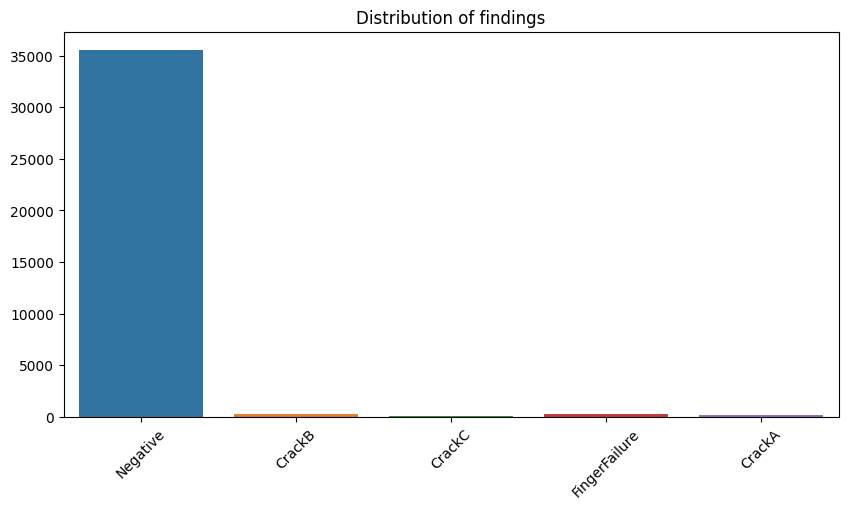

In [152]:
plt.rcParams["figure.figsize"] = (10,5)
x = list(overview.keys())
y = list(overview.values())
sns.barplot(x = x,y = y)
plt.title('Distribution of findings')
plt.xticks(rotation=45)

## Splitting data
Stratification er noget bøvl på multilabel, så vi laver en variabel der hedder isfault og stratifier på den i stedet for

In [306]:
data['is_fault'] = data['Label'].apply(lambda x: True if x[0] != 'Negative' else False)

In [315]:
def main_lab(labels):
    if 'CrackC' in labels:
        lab = 'CrackC'
    elif 'CrackB' in labels:
        lab = 'CrackB'
    elif 'CrackA' in labels:
        lab = 'CrackA'
    elif 'FingerFailure' in labels:
        lab = 'FingerFailure'
    else:
        lab = 'Negative'
    return lab

In [316]:
data['main_lab'] = data['Label'].apply(lambda x: main_lab(x))

In [317]:
display(data)

,ImageDir,Label,MaskDir,is_fault,main_lab
0,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,[Negative],nan,False,Negative
1,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,[Negative],nan,False,Negative
2,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,[Negative],nan,False,Negative
3,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,[Negative],nan,False,Negative
4,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,[Negative],nan,False,Negative
...,...,...,...,...,...
36047,VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...,[Negative],nan,False,Negative
36048,VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...,[Negative],nan,False,Negative
36049,VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...,[Negative],nan,False,Negative
36050,VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...,[Negative],nan,False,Negative


In [318]:
Train,test_val = train_test_split(data, test_size = 0.4, random_state = 42, stratify = data['main_lab'])
test,val = train_test_split(test_val, test_size = 0.5, random_state = 42, stratify = test_val['main_lab'])

In [326]:
#/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData
Train.to_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/TrainVitusStat.csv')
test.to_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/TestVitusStat.csv')
val.to_csv('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/ValVitusStat.csv')

In [319]:
len(Train),len(test),len(val)

(21631, 7210, 7211)

In [320]:
def overview_disease(data):
  overview = {}
  for findings in data['Label']:
    for j in findings:
      if j in overview.keys():
        overview[j] += 1
      else:
        overview[j] = 1
  return overview
overview = overview_disease(Train)
display(overview)

{'Negative': 21031,
 'CrackC': 99,
 'FingerFailure': 415,
 'CrackB': 217,
 'CrackA': 148}

In [321]:
overview = overview_disease(val)
display(overview)

{'Negative': 7011,
 'CrackB': 67,
 'FingerFailure': 124,
 'CrackC': 30,
 'CrackA': 55}

In [322]:
overview = overview_disease(test)
display(overview)

{'Negative': 7010,
 'FingerFailure': 169,
 'CrackA': 45,
 'CrackC': 32,
 'CrackB': 57}

In [47]:
X_train.head()

,ImageDir,MaskDir
21366,VitusData/Serier/Series4/CellsCorr/Serie_4_Ima...,nan
32931,VitusData/Serier/Series6/CellsCorr/Serie_6_Ima...,nan
6711,VitusData/Serier/Series1/CellsCorr/Serie_1_Ima...,nan
23674,VitusData/Serier/Series4/CellsCorr/Serie_4_Ima...,nan
13910,VitusData/Serier/Series2/CellsCorr/Serie_2_Ima...,nan


In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms

In [2]:
im = Image.open('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/Serier/Series1/CellsCorr/Serie_1_ImageCorr_-1_4085_Cell_Row1_Col_2.png')

In [7]:
print(np.array(im))

[[31 32 23 ... 12  9 10]
 [26 28 21 ...  9  7 10]
 [21 20 21 ...  5  5 10]
 ...
 [36 40 44 ... 28 32 37]
 [41 47 42 ... 39 40 43]
 [46 52 42 ... 37 40 43]]


In [5]:
transforms.ToTensor()(im)

tensor([[[0.1216, 0.1255, 0.0902,  ..., 0.0471, 0.0353, 0.0392],
         [0.1020, 0.1098, 0.0824,  ..., 0.0353, 0.0275, 0.0392],
         [0.0824, 0.0784, 0.0824,  ..., 0.0196, 0.0196, 0.0392],
         ...,
         [0.1412, 0.1569, 0.1725,  ..., 0.1098, 0.1255, 0.1451],
         [0.1608, 0.1843, 0.1647,  ..., 0.1529, 0.1569, 0.1686],
         [0.1804, 0.2039, 0.1647,  ..., 0.1451, 0.1569, 0.1686]]])

In [22]:
(337**2)*0.05

5678.450000000001

In [48]:
im = Image.open('/Users/madsandersen/PycharmProjects/BscProjektData/BachelorProject/Data/VitusData/Masks/-2_4141_Cell_Row7_Col_2_CrackB_4.png')

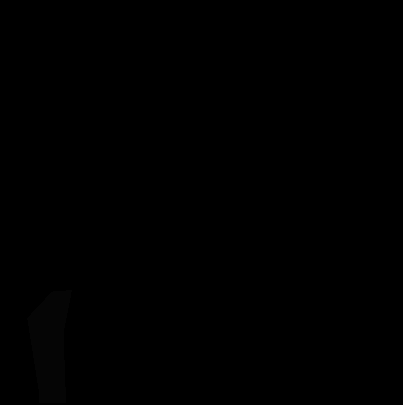

In [49]:
im

In [54]:
a = np.array(im)

In [55]:
print(a)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [56]:
a.sum()

17175

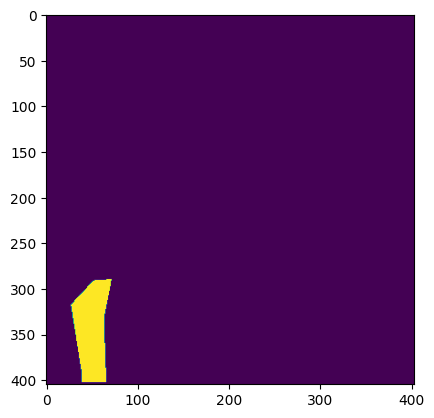

In [53]:
plt.imshow(a)

In [198]:
import torch

In [200]:
a = torch.tensor([1,2,3])
a.sum()

tensor(6)

In [ ]:
.sum